***🏪 Retail Business Intelligence: BikeStores Database Analysis***

***Project Description***

In today's data-driven retail environment, deriving actionable insights from sales, customer, and inventory data is essential for making informed business decisions. This project, titled is a Comprehensive Analysis of BikeStores Data," explores transactional and operational data from a multi-store bicycle retailer to uncover trends in customer behavior, sales performance, staff efficiency, and inventory management.

***Objective***
The primary objective of this project is to use data analytics and machine learning techniques to:

Understand sales and revenue patterns over time and across stores

Profile customer behavior and segmentation

Monitor order processing and fulfillment trends

Evaluate staff performance and distribution

Track inventory health and optimize stock levels

Identify underperforming or high-potential products and stores

Forecast future sales and support predictive decision-making

***Data Sources***
This project utilizes the BikeStores sample database, composed of multiple interconnected tables, each representing a core business entity:

orders, order_items: Contain transaction details including sales, discounts, dates, and items purchased.

customers: Information about customer demographics and contact details.

products, brands, categories: Represent the product catalog and brand classification.

stores: Metadata about different store branches and their locations.

staffs: Details on staff members, their activity, and store assignments.

stocks: Current inventory levels for products across stores.

In [32]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "Bike_stores",
    "user": "postgres",
    "password": "4823Em15@"
}
conn = psycopg2.connect(**db_params)

***🛍️ Sales & Revenue Insights***

This section focuses on analyzing sales trends and revenue generation across time, stores, and products.

Understanding revenue patterns helps the business identify peak sales periods, top-performing stores, and high-value products. 

These insights are crucial for revenue forecasting, inventory planning, and strategic decision-making.

***What is the total revenue generated?***

In [34]:
query = """
SELECT 
    SUM(quantity * list_price * (1 - discount)) AS total_revenue
FROM order_items;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\636704395.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,total_revenue
0,7.689117e+06


*** What is the revenue per store?***

In [35]:
query = """
SELECT 
    s.store_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS revenue
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name
ORDER BY revenue DESC;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3783673814.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,store_name,revenue
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


***What are the top-selling products by quantity and revenue?***

In [36]:
query = """
SELECT 
    p.product_name,
    SUM(oi.quantity) AS total_quantity,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2461237303.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,product_name,total_quantity,total_revenue
0,Trek Slash 8 27.5 - 2016,154,555558.6111
1,Trek Conduit+ - 2016,145,389248.7025
2,Trek Fuel EX 8 29 - 2016,143,368472.7294
3,Surly Straggler 650b - 2016,151,226765.5510
4,Trek Domane SLR 6 Disc - 2017,43,211584.6153
5,Surly Straggler - 2016,147,203507.6200
6,Trek Remedy 29 Carbon Frameset - 2016,125,203380.8701
7,Trek Powerfly 8 FS Plus - 2017,41,188249.6235
8,Trek Madone 9.2 - 2017,39,175899.6482
9,Trek Silque SLR 8 Women's - 2017,29,174524.7315


***Which category or brand brings in the most sales***

In [37]:
# By category
category_query = """
SELECT 
    c.category_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_revenue DESC;
"""
category_df = pd.read_sql(category_query, conn)
print(category_df)
# By brand
brand_query = """
SELECT 
    b.brand_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN brands b ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY total_revenue DESC;
"""
brand_df = pd.read_sql(brand_query, conn)
print(brand_df)


         category_name  total_revenue
0       Mountain Bikes   2.715080e+06
1           Road Bikes   1.665098e+06
2    Cruisers Bicycles   9.950326e+05
3       Electric Bikes   9.166848e+05
4  Cyclocross Bicycles   7.110118e+05
5     Comfort Bicycles   3.940201e+05
6    Children Bicycles   2.921892e+05
     brand_name  total_revenue
0          Trek   4.602754e+06
1       Electra   1.205321e+06
2         Surly   9.495071e+05
3  Sun Bicycles   3.419949e+05
4          Haro   1.853846e+05
5        Heller   1.714591e+05
6   Pure Cycles   1.494763e+05
7       Ritchey   7.889895e+04
8       Strider   4.320479e+03


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3935477587.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_df = pd.read_sql(category_query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3935477587.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brand_df = pd.read_sql(brand_query, conn)


***Which months had the highest sales?***

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3504398774.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales = pd.read_sql(query, conn)


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

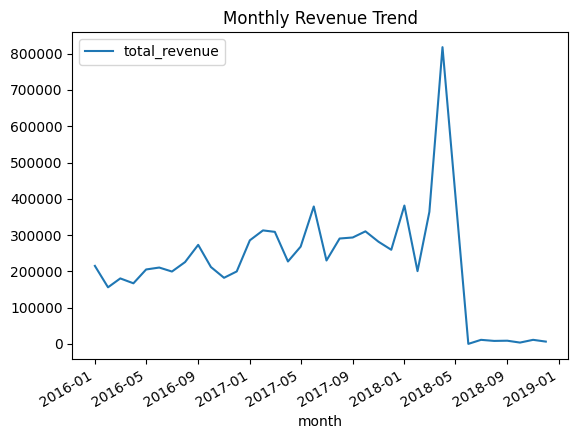

In [38]:
query = """
SELECT 
    DATE_TRUNC('month', order_date) AS month,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)
monthly_sales.plot(x='month', y='total_revenue', kind='line', title='Monthly Revenue Trend')


***What is the average order value per customer?***

In [39]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent,
    AVG(oi.quantity * oi.list_price * (1 - oi.discount)) AS avg_order_value
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id, customer_name
ORDER BY total_spent DESC;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3233395354.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,customer_id,customer_name,total_orders,total_spent,avg_order_value
0,94,Sharyn Hopkins,2,34807.9392,3480.793920
1,10,Pamelia Newman,3,33634.2604,3057.660036
2,75,Abby Gamble,2,32803.0062,4686.143743
3,6,Lyndsey Bean,3,32675.0725,2970.461136
4,16,Emmitt Sanchez,3,31925.8857,2660.490475
...,...,...,...,...,...
1440,752,Lloyd Miranda,1,170.9910,170.991000
1441,177,Carissa Foreman,1,170.9910,170.991000
1442,1111,Caroline Jenkins,1,170.9910,170.991000
1443,718,Luciana Mcgee,1,167.9920,167.992000


***🧠 Customer Behavior***

Understanding customer behavior is key to customer-centric strategies.

This section explores customer purchase frequency, spending patterns, and geographic distribution.

It enables segmentation and targeting of high-value customers, helping optimize marketing and retention efforts.

***Top Customers by Total Spend***

In [40]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql_query(query, conn)
df_top_customers


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3978638129.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_customers = pd.read_sql_query(query, conn)


,customer_id,customer_name,total_orders,total_spent
0,94,Sharyn Hopkins,2,34807.9392
1,10,Pamelia Newman,3,33634.2604
2,75,Abby Gamble,2,32803.0062
3,6,Lyndsey Bean,3,32675.0725
4,16,Emmitt Sanchez,3,31925.8857
5,73,Melanie Hayes,2,31913.6902
6,1,Debra Burks,3,27888.1834
7,61,Elinore Aguilar,3,25636.4531
8,93,Corrina Sawyer,2,25612.7021
9,122,Shena Carter,1,24890.6244


***Average Order Value (AOV) per Customer***

In [41]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY avg_order_value DESC
LIMIT 10;
"""
df_avg_order_value = pd.read_sql_query(query, conn)
df_avg_order_value


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2109653872.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_order_value = pd.read_sql_query(query, conn)


,customer_id,customer_name,total_orders,total_spent,avg_order_value
0,122,Shena Carter,1,24890.6244,24890.62
1,1224,Abram Copeland,1,24607.0261,24607.03
2,1214,Brigid Sharp,1,20648.9537,20648.95
3,425,Augustina Joyner,1,20509.4254,20509.43
4,238,Cindi Larson,1,20177.7457,20177.75
5,1023,Adena Blake,1,19329.9492,19329.95
6,464,Bess Mcbride,1,18853.3544,18853.35
7,1100,Penny Acevedo,1,18670.9288,18670.93
8,227,Danielle Bond,1,18553.7300,18553.73
9,108,Shae Hickman,1,18281.4729,18281.47


***Customers with Most Orders***

In [42]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, customer_name
ORDER BY order_count DESC
LIMIT 10;
"""
df_most_orders = pd.read_sql_query(query, conn)
df_most_orders


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\683875539.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_most_orders = pd.read_sql_query(query, conn)


,customer_id,customer_name,order_count
0,2,Kasha Todd,3
1,3,Tameka Fisher,3
2,4,Daryl Spence,3
3,5,Charolette Rice,3
4,6,Lyndsey Bean,3
5,7,Latasha Hays,3
6,8,Jacquline Duncan,3
7,9,Genoveva Baldwin,3
8,10,Pamelia Newman,3
9,1,Debra Burks,3


***Most Active States (Customer Locations by Order Volume)***

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2662525549.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_states_activity = pd.read_sql_query(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2662525549.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_states_activity, x='state', y='order_count', palette='coolwarm')


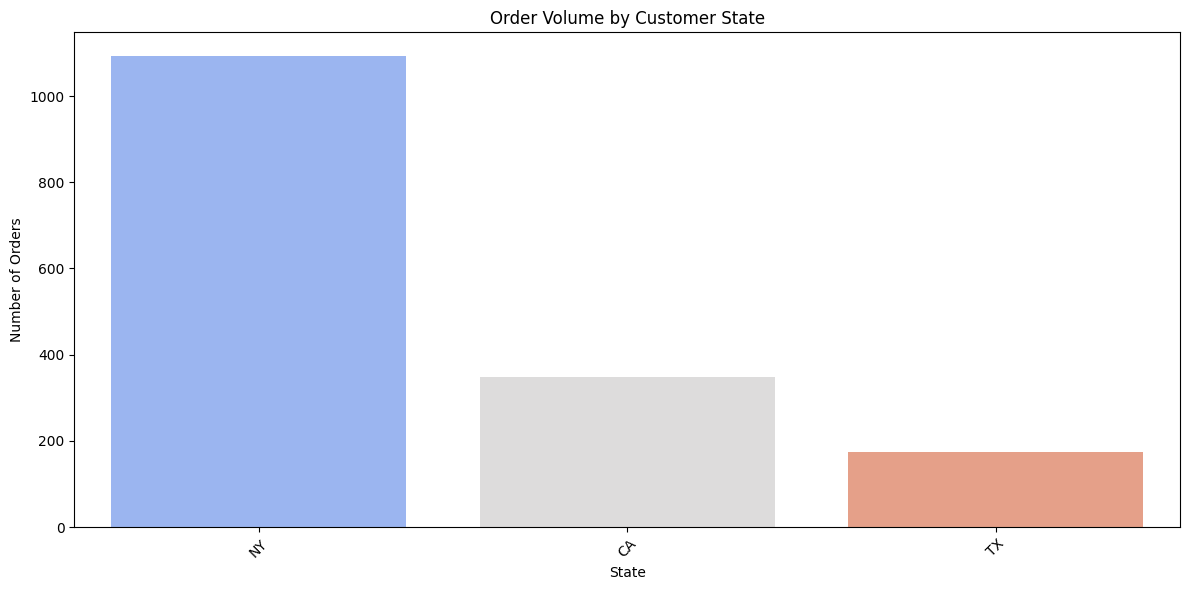

In [43]:
query = """
SELECT 
    c.state,
    COUNT(DISTINCT o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.state
ORDER BY order_count DESC;
"""
df_states_activity = pd.read_sql_query(query, conn)
df_states_activity
# visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df_states_activity, x='state', y='order_count', palette='coolwarm')
plt.title('Order Volume by Customer State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Repeat vs. One-Time Customers***

In [44]:
query = """
SELECT 
    CASE 
        WHEN order_count = 1 THEN 'One-time'
        ELSE 'Repeat'
    END AS customer_type,
    COUNT(*) AS customer_count
FROM (
    SELECT 
        c.customer_id,
        COUNT(DISTINCT o.order_id) AS order_count
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
) sub
GROUP BY customer_type;
"""
df_repeat_customers = pd.read_sql_query(query, conn)
df_repeat_customers


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\731108457.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_repeat_customers = pd.read_sql_query(query, conn)


,customer_type,customer_count
0,One-time,1314
1,Repeat,131


***🗂️ Order Management***

This section analyzes order lifecycle metrics such as order volume, processing status, shipping times, and staff/store involvement. 

Efficient order management is essential for customer satisfaction, logistics planning, and identifying bottlenecks in the order fulfillment process.

***How many orders are placed per month?***

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3068256320.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders_per_month = pd.read_sql_query(query, conn)


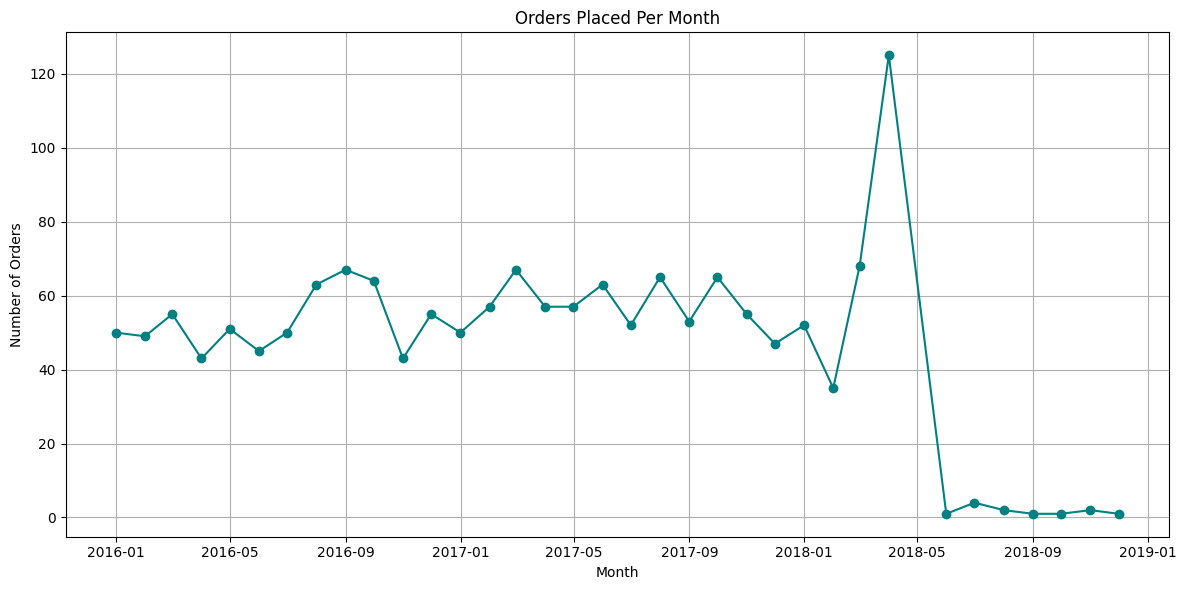

In [45]:
query = """
SELECT 
    DATE_TRUNC('month', order_date) AS month,
    COUNT(*) AS order_count
FROM orders
GROUP BY month
ORDER BY month;
"""
df_orders_per_month = pd.read_sql_query(query, conn)
df_orders_per_month
# visualization
plt.figure(figsize=(12,6))
plt.plot(df_orders_per_month['month'], df_orders_per_month['order_count'], marker='o', color='teal')
plt.title('Orders Placed Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


***What is the status breakdown of orders (completed, pending)?***

In [46]:
query = """
SELECT 
    order_status,
    COUNT(*) AS count
FROM orders
GROUP BY order_status
ORDER BY count DESC;
"""
df_status_breakdown = pd.read_sql_query(query, conn)
df_status_breakdown


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\142983638.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_status_breakdown = pd.read_sql_query(query, conn)


,order_status,count
0,4,1445
1,2,63
2,1,62
3,3,45


***How long does it take on average to ship an order?***

In [47]:
query = """
SELECT 
    AVG(shipped_date - order_date) AS avg_shipping_days
FROM orders
WHERE shipped_date IS NOT NULL;
"""
df_avg_shipping = pd.read_sql_query(query, conn)
df_avg_shipping


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\4138133821.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_shipping = pd.read_sql_query(query, conn)


,avg_shipping_days
0,1.982007


***Which stores handle the most orders?***

In [48]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    COUNT(o.order_id) AS total_orders
FROM stores st
JOIN orders o ON st.store_id = o.store_id
GROUP BY st.store_id, st.store_name
ORDER BY total_orders DESC;
"""
df_top_stores = pd.read_sql_query(query, conn)
df_top_stores


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3795436524.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_stores = pd.read_sql_query(query, conn)


,store_id,store_name,total_orders
0,2,Baldwin Bikes,1093
1,1,Santa Cruz Bikes,348
2,3,Rowlett Bikes,174


***👥 Staff Performance***

Staff directly influence store operations and customer experience. This section evaluates staff distribution, activity levels, and effectiveness. 

It helps in identifying high-performing employees, workload distribution, and opportunities for training or restructuring.

***staff performance based on orders processed***

In [49]:
query = """
SELECT 
    s.staff_id,
    s.first_name || ' ' || s.last_name AS staff_name,
    COUNT(o.order_id) AS total_orders
FROM staffs s
JOIN orders o ON s.staff_id = o.staff_id
GROUP BY s.staff_id, staff_name
ORDER BY total_orders DESC
LIMIT 10;
"""
df_top_staff = pd.read_sql_query(query, conn)
df_top_staff


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\128620618.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_staff = pd.read_sql_query(query, conn)


,staff_id,staff_name,total_orders
0,6,Marcelene Boyer,553
1,7,Venita Daniel,540
2,3,Genna Serrano,184
3,2,Mireya Copeland,164
4,8,Kali Vargas,88
5,9,Layla Terrell,86


***How many staff work in each store?***

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3077932040.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_staff_per_store = pd.read_sql_query(query, conn)


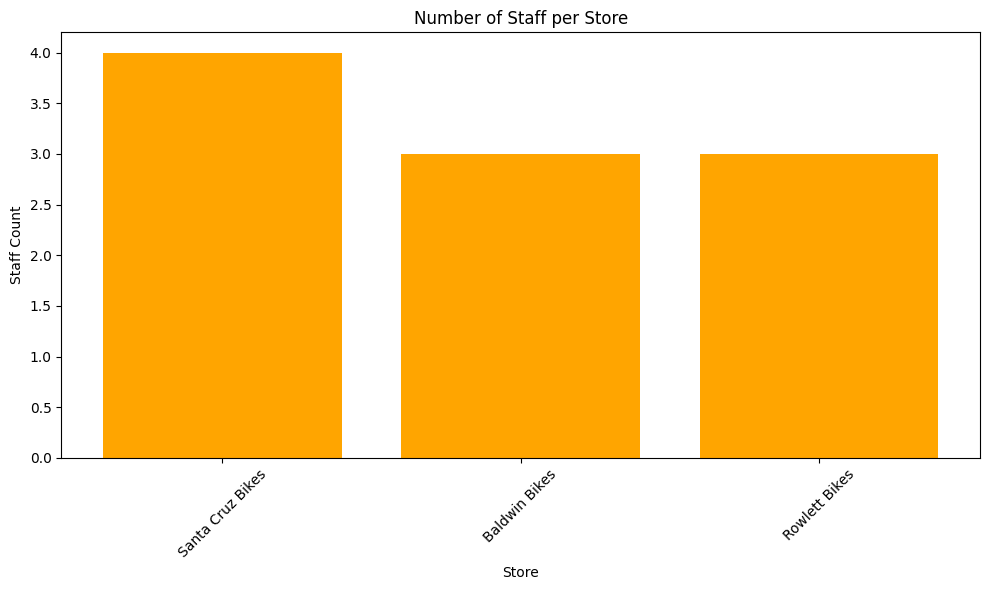

In [50]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    COUNT(sf.staff_id) AS staff_count
FROM stores st
LEFT JOIN staffs sf ON st.store_id = sf.store_id
GROUP BY st.store_id, st.store_name
ORDER BY staff_count DESC;
"""
df_staff_per_store = pd.read_sql_query(query, conn)
df_staff_per_store
# visualization
plt.figure(figsize=(10,6))
plt.bar(df_staff_per_store['store_name'], df_staff_per_store['staff_count'], color='orange')
plt.title('Number of Staff per Store')
plt.xlabel('Store')
plt.ylabel('Staff Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
query = """
SELECT 
    active,
    COUNT(*) AS staff_count
FROM staffs
GROUP BY active;
"""

df_active_status = pd.read_sql_query(query, conn)
df_active_status
df_active_status['status'] = df_active_status['active'].map({True: 'Active', False: 'Inactive'})
df_active_status


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\4228200539.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_active_status = pd.read_sql_query(query, conn)


,active,staff_count,status
0,True,10,Active


***📦 Inventory Insights***

Inventory management is critical for balancing supply and demand. 

This section examines stock levels across products and stores, identifies low or zero-stock items, and calculates inventory value. 

These insights help prevent stockouts, reduce holding costs, and inform procurement strategies.

***What is the total stock per product across all stores?***

In [52]:
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(s.quantity) AS total_stock
FROM products p
JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
ORDER BY total_stock DESC;
"""
df_total_stock = pd.read_sql_query(query, conn)
df_total_stock.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2999109532.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_stock = pd.read_sql_query(query, conn)


,product_id,product_name,total_stock
0,188,Trek XM700+ Lowstep - 2018,86
1,64,Electra Townie Original 7D - 2017,82
2,109,Sun Bicycles Cruz 7 - Women's - 2017,79
3,196,Trek Verve+ - 2018,79
4,61,Trek Powerfly 8 FS Plus - 2017,78


***Which store has the most inventory for each product?***

In [53]:
query = """
SELECT 
    s.product_id,
    p.product_name,
    s.store_id,
    st.store_name,
    s.quantity
FROM stocks s
JOIN (
    SELECT product_id, MAX(quantity) AS max_qty
    FROM stocks
    GROUP BY product_id
) max_stock ON s.product_id = max_stock.product_id AND s.quantity = max_stock.max_qty
JOIN products p ON s.product_id = p.product_id
JOIN stores st ON s.store_id = st.store_id
ORDER BY s.product_id;
"""
df_max_per_product = pd.read_sql_query(query, conn)
df_max_per_product.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\617101794.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_max_per_product = pd.read_sql_query(query, conn)


,product_id,product_name,store_id,store_name,quantity
0,1,Trek 820 - 2016,1,Santa Cruz Bikes,27
1,2,Ritchey Timberwolf Frameset - 2016,3,Rowlett Bikes,24
2,3,Surly Wednesday Frameset - 2016,2,Baldwin Bikes,28
3,4,Trek Fuel EX 8 29 - 2016,1,Santa Cruz Bikes,23
4,5,Heller Shagamaw Frame - 2016,1,Santa Cruz Bikes,22


***Are there any products out of stock?***

In [54]:
query = """
SELECT 
    p.product_id,
    p.product_name
FROM products p
LEFT JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
HAVING COALESCE(SUM(s.quantity), 0) = 0;
"""
df_out_of_stock = pd.read_sql_query(query, conn)
df_out_of_stock


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\1636180390.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_out_of_stock = pd.read_sql_query(query, conn)


,product_id,product_name
0,314,Electra Townie Original 21D EQ Ladies' - 2018
1,315,Electra Townie Original 21D Ladies' - 2018
2,321,Trek Checkpoint ALR Frameset - 2019
3,319,Trek Checkpoint SL 5 Women's - 2019
4,320,Trek Checkpoint SL 6 - 2019
5,317,Trek Checkpoint ALR 5 - 2019
6,318,Trek Checkpoint ALR 5 Women's - 2019
7,316,Trek Checkpoint ALR 4 Women's - 2019


*** Which products have low inventory (e.g., <10 units)?***

In [55]:
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(s.quantity) AS total_stock
FROM products p
JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
HAVING SUM(s.quantity) < 10
ORDER BY total_stock;
"""
df_low_inventory = pd.read_sql_query(query, conn)
df_low_inventory


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\639180895.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_low_inventory = pd.read_sql_query(query, conn)


,product_id,product_name,total_stock
0,175,Trek Domane SLR Frameset - 2018,5
1,289,Electra Superbolt 1 20 - 2018,9


***Inventory value per store***

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3918348501.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_inventory_value = pd.read_sql_query(query, conn)


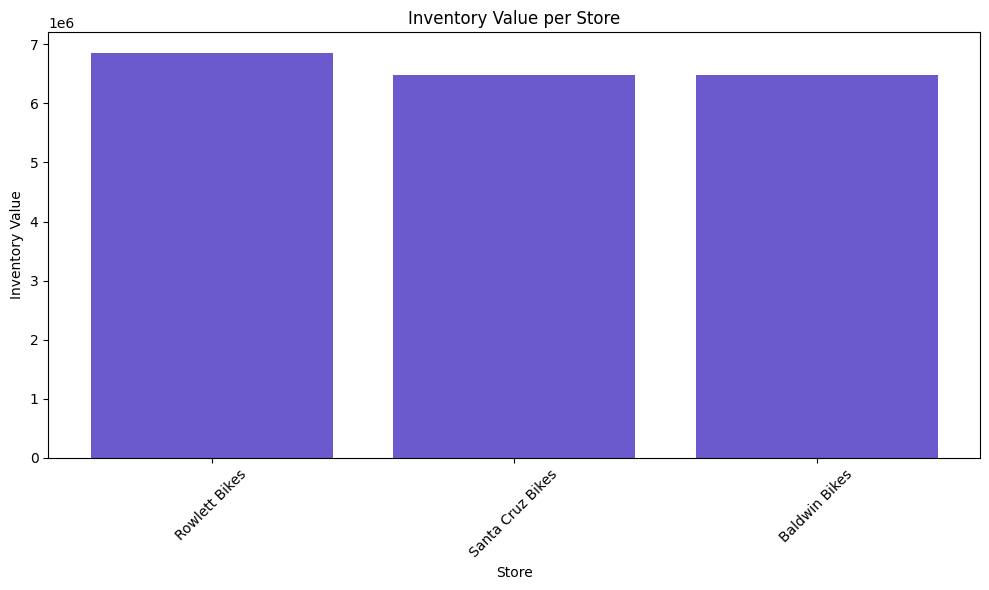

In [56]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    ROUND(SUM(s.quantity * p.list_price), 2) AS inventory_value
FROM stocks s
JOIN stores st ON s.store_id = st.store_id
JOIN products p ON s.product_id = p.product_id
GROUP BY st.store_id, st.store_name
ORDER BY inventory_value DESC;
"""
df_inventory_value = pd.read_sql_query(query, conn)
df_inventory_value
# visualization
plt.figure(figsize=(10,6))
plt.bar(df_inventory_value['store_name'], df_inventory_value['inventory_value'], color='slateblue')
plt.title('Inventory Value per Store')
plt.xlabel('Store')
plt.ylabel('Inventory Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***📦 Product Insights***

Analyzing product-level data helps the business understand market demand and product performance.

This section identifies products with no sales, bestsellers, and those with low stock. 

It supports decisions on promotions, discontinuations, and product development.

***Which products haven’t been ordered at all?***

In [57]:
query = """
SELECT 
    p.product_id,
    p.product_name
FROM products p
LEFT JOIN order_items oi ON p.product_id = oi.product_id
WHERE oi.product_id IS NULL;
"""
df_unordered_products = pd.read_sql_query(query, conn)
df_unordered_products


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\1648786499.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_unordered_products = pd.read_sql_query(query, conn)


,product_id,product_name
0,1,Trek 820 - 2016
1,121,Surly Krampus Frameset - 2018
2,125,Trek Kids' Dual Sport - 2018
3,154,Trek Domane SLR 6 Disc Women's - 2018
4,195,Electra Townie Go! 8i Ladies' - 2018
5,267,Trek Precaliber 12 Girl's - 2018
6,284,Electra Savannah 1 (20-inch) - Girl's - 2018
7,291,Electra Sweet Ride 1 (20-inch) - Girl's - 2018
8,316,Trek Checkpoint ALR 4 Women's - 2019
9,317,Trek Checkpoint ALR 5 - 2019
